# Model vs Observations

## Import Needed Libraries

In [1]:
%matplotlib inline
#import needed modules to plot data
import numpy as np
import pandas as pd
import csv
import xarray as xr
import csv
import datetime
from scipy import stats
#import cartopy.crs as ccrs
# from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
# type(WhGrYlRd)  # our custom colormap

In [2]:
#Upload baseline ATM Hg at Chacaltaya
ds_baseCHC=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/baseMDD/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [3]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in MDD
ds_CHC_mdd=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/2xMDD/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [4]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in Arequipa
ds_CHC_aqp=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/aqp_updated/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [5]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in South Puno
ds_CHC_Spuno=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/Puno/SouthPuno_C/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [6]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in North Puno
ds_CHC_Npuno=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/Puno/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [7]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in Apurímac
ds_CHC_aprc=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/150percent_MDD_emit/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')


In [8]:
ds_baseCHC

<xarray.Dataset>
Dimensions:          (time: 17520, lev: 20, ilev: 21, lat: 1, lon: 1)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-01T00:30:00 ... 2015-12-31...
  * lev              (lev) float64 0.9925 0.9775 0.9625 ... 0.6875 0.6563 0.6188
  * ilev             (ilev) float64 1.0 0.985 0.97 0.955 ... 0.675 0.6375 0.6
  * lat              (lat) float64 -16.0
  * lon              (lon) float64 -67.5
Data variables:
    hyam             (time, lev) float64 dask.array<chunksize=(744, 20), meta=np.ndarray>
    hybm             (time, lev) float64 dask.array<chunksize=(744, 20), meta=np.ndarray>
    hyai             (time, ilev) float64 dask.array<chunksize=(744, 21), meta=np.ndarray>
    hybi             (time, ilev) float64 dask.array<chunksize=(744, 21), meta=np.ndarray>
    P0               (time) float64 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
    AREA             (time, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    SpeciesConc_HgP  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
    SpeciesConc_Hg2  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
    SpeciesConc_Hg0  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
Attributes:
    title:                           GEOS-Chem diagnostic collection: Species...
    history:                         
    format:                          CFIO
    conventions:                     COARDS
    ProdDateTime:                    
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2014-01-01 00:00:00z
    simulation_end_date_and_time:    2016-01-01 00:00:00z

In [9]:
#get the geoschem variable names 
for item in ds_baseCHC.keys():
    
    dic=ds_baseCHC[item].attrs
    res = [item] 
    for key in dic.keys() : 
        res.append(dic[key]) 
    #print(res)
    #Cat_m.append(res)

In [10]:
# BASE MDD
Hg0 = ds_baseCHC.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level

In [11]:
# Modified Model Outputs 
Hg0_mdd   = ds_CHC_mdd.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
Hg0_aqp   = ds_CHC_aqp.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_Spuno = ds_CHC_Spuno.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_Npuno = ds_CHC_Npuno.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_aprc  = ds_CHC_aprc.SpeciesConc_Hg0.isel(lev = 19).squeeze()

In [12]:
# convert units to ng m^-3
R = 8.314462 # m^3 Pa K^-1 mol ^-1
MW_Hg = 200.59 # g mol^-1
ng_g = 1e9 # ng/g

stdpressure = 101325 # Pascals
stdtemp = 273.15 # Kelvins

unit_conv = stdpressure / R / stdtemp * MW_Hg * ng_g # converter from vmr to ng m^-3

Hg0 = Hg0 * unit_conv
Hg0_mdd = Hg0_mdd * unit_conv
Hg0_aqp = Hg0_aqp * unit_conv
Hg0_Spuno = Hg0_Spuno * unit_conv
Hg0_Npuno = Hg0_Npuno * unit_conv
Hg0_aprc  = Hg0_aprc * unit_conv

In [13]:
#Hg0.to_dataframe().resample('D').mean()

# Function to extract Hg0 at model grid boxes

In [14]:
"""
Created on Fri May  7 14:24:42 2021
Extract Hg0 at model grid boxes for comparison with observations
@author: arifeinberg
"""
#%%
import xarray as xr
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# /net/fs03/d0/arifein/python/GEOS-Chem_runs/run0003/OutputDir

#%%
os.chdir('/net/fs03/d0/arifein/python/')
#%%
def get_model_ts(site_str): # get model time series
    # first check if site files exist
    pn1 = '../GEOS-Chem_runs/run0003/OutputDir/' # path of BASE simulation
    pn2 = '../GEOS-Chem_runs/run0004/OutputDir/' # path of ASGM simulation
    fn  = 'GEOSChem.SpeciesConc' + site_str + '.alltime_d.nc4' # time series at site
    
    bool_exists = path.exists(pn1 + fn) # boolean to check if exists
    if not bool_exists :
        print('Error with filename or site string incorrect')
        return
    
    # continue with extracting model data
    ds1 = xr.open_dataset(pn1 + fn) # BASE simulation
    ds2 = xr.open_dataset(pn2 + fn) # ASGM simulation
    
    if site_str == 'CHC' : # CHC altitude is close to GEOS-Chem level 20
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
        # ASGM        
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
    elif site_str == 'TIT' : # TIT altitude is close to GEOS-Chem level 15
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 14).squeeze() # subset for level
        # ASGM    
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 14).squeeze() # subset for level            
    else : # assume that all other sites are at the surface
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 0).squeeze()
        # ASGM        
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 0).squeeze() # subset for level
        
    # convert units to ng m^-3
    R = 8.314462 # m^3 Pa K^-1 mol ^-1
    MW_Hg = 200.59 # g mol^-1
    ng_g = 1e9 # ng/g
    
    stdpressure = 101325 # Pascals
    stdtemp = 273.15 # Kelvins
    
    unit_conv = stdpressure / R / stdtemp * MW_Hg * ng_g # converter from vmr to ng m^-3
    
    Hg0 = Hg0 * unit_conv
    Hg0_ASGM = Hg0_ASGM * unit_conv
    
    # calculate contribution from ASGM
    Hg0_c_ASGM = Hg0 - Hg0_ASGM # contribution from ASGM emissions
        
    # return both time series
    return Hg0, Hg0_c_ASGM

# Function to get observations at CHC

In [15]:
def get_chc_obs(source): # get observations for Chacaltaya
    chc_raw= pd.read_csv(source,delimiter = ";")
    #The first 35 rows of the csv file is descriptive information
    chc = chc_raw.iloc[35:]

    #Reset the index
    chc.reset_index(inplace= True, drop =True)

    #rename columns appropriately
    chc.columns =['tstamp','value']

    #drop NA values in the dataframe
    chc = chc[chc['value'].notna()]
    chc.reset_index(inplace= True, drop =True)
    chc
    #change concentrations to floating point since they are currently strings
    conc=[]
    for index, dat in enumerate(chc['value']):
        num = dat.split(",")
        if len(num)!=2:
            conc.append(float(dat))
        else:
            conc.append(float(num[0]+"."+num[1]))
    chc['value'] = conc

    # Convert that column into a datetime datatype
    chc['tstamp'] = pd.to_datetime(chc['tstamp'],dayfirst=True,utc=True) 

    chc.index = chc['tstamp'] # Set the datetime column as the index
   
    return chc

# Function to Get Observations from GMOS sites except CHC

In [16]:
def get_data(station):#BAR,CAL,CST, MAN,NIK, SIS
    #convert string to uppercase just incase the case is different 
    station = str(station.upper())
    #create dictionary for file path
    sites = {'BAR':'Bariloche/BAR.csv', 'CAL':'Calhau/CAL.csv','CST':'Celestun/CST.csv','MAN':'Manaus/MAN.csv','NIK':'Niew Nickerie/NIK.csv','SIS':'Sisal/SIS.csv' }
    
    #check if given name is in the list of sites
    if station.upper() in ['BAR','CAL','CST', 'MAN','NIK','SIS']:
        #create function to upload the data from svante
        def get_site(station):
            source='../../../d1/tzd/GMOS_Observations/GMOS_Observations/'+sites[station]
            site= pd.read_csv(source)
            return site
        
  #get required columns from the raw data
        time= get_site(station)['tstamp']
        value= get_site(station)['value']
        unit = get_site(station)['uom']
        
        return pd.concat([time,value,unit], axis=1)# return a data frame with the timestamp, value and units of measurement
    else:# error message if user enter the wrong name that is not any of the sites 
        return "Please try again, use either one of the following 'BAR','CAL','CST', 'MAN','NIK', 'SIS' "
    

# Function that combines functions that get observations

In [110]:
def get_obs_ts(site_str):
    #check if it is Chacaltaya:
    if site_str == 'CHC' : # different file formate for Chacaltaya
        #Location of data in Svante
        path14 ='../../../d1/tzd/GMOS_Observations/2014/L1_TGM_CHC_2014.csv'
        path15 ='../../../d1/tzd/GMOS_Observations/2015/L1_TGM_CHC_2015.csv'
        # combine data from the two years
        obs_Hg0 =  pd.concat([get_chc_obs(path14), get_chc_obs(path15)], axis=0)
        # convert to datetime
        obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'],dayfirst=True)
    else:
        obs_Hg0 = get_data(site_str)
    
    return obs_Hg0       

# Function for getting model output and oservations 

In [111]:
def get_model_obs(site_str): #get model and observation data
    # model data
    model_Hg0, model_Hg0_ASGM = get_model_ts(site_str)
    # observation data
    obs_Hg0 = get_obs_ts(site_str)

    return obs_Hg0, model_Hg0.to_dataframe(), model_Hg0_ASGM.to_dataframe()

## Sanity Check

In [65]:
obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs('NIK')
print('Observations')
print(obs_Hg0.head(5))
print('\nRefference Simulation')
print(model_Hg0.head(5))
print('\nASGM Simulation')
print(model_Hg0_ASGM.head(5))

Observations
                tstamp  value     uom
0  2007-03-14T17:45:00  0.437  ng_m-3
1  2007-03-14T18:00:00  0.637  ng_m-3
2  2007-03-14T18:15:00  0.567  ng_m-3
3  2007-03-14T18:30:00  0.650  ng_m-3
4  2007-03-14T18:45:00  0.561  ng_m-3

Refference Simulation
                      lon  lat     lev  SpeciesConc_Hg0
time                                                   
2010-01-01 12:00:00 -57.5  6.0  0.9925         1.367003
2010-01-02 12:00:00 -57.5  6.0  0.9925         1.393025
2010-01-03 12:00:00 -57.5  6.0  0.9925         1.391835
2010-01-04 12:00:00 -57.5  6.0  0.9925         1.403095
2010-01-05 12:00:00 -57.5  6.0  0.9925         1.380743

ASGM Simulation
                      lon  lat     lev  SpeciesConc_Hg0
time                                                   
2010-01-01 12:00:00 -57.5  6.0  0.9925         0.023157
2010-01-02 12:00:00 -57.5  6.0  0.9925         0.037035
2010-01-03 12:00:00 -57.5  6.0  0.9925         0.045609
2010-01-04 12:00:00 -57.5  6.0  0.9925         

# Create function to prepare the data for making plots 

In [114]:
def prep_plot(site):
    
   # Call function with site name
    sitenm = site #BAR,CAL,CST, MAN,NIK, SIS, CHC
    obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs(sitenm)
  
        
    #resample observations so that they are daily values
    obs_Hg0['value'] = obs_Hg0['value'].mask(obs_Hg0['value']<0) #missing values
    obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'])
    obs_Hg0_d = obs_Hg0.set_index('tstamp').resample('D').mean() #daily mean values, ignoring NaN
    obs_Hg0_d.index=pd.to_datetime(obs_Hg0_d.index.date)

    start = str(obs_Hg0['tstamp'].iloc[0])
    end =str(obs_Hg0['tstamp'].iloc[-1])
    if sitenm== 'CHC':
        start=start.split('+')[0]
        end=end.split('+')[0]
    
    #df['time'] = pd.to_datetime(df['time']).dt.date
    #Tmodel=model_Hg0.to_dataframe().loc[start:end]['SpeciesConc_Hg0']
    Tmodel=model_Hg0.loc[start:end]['SpeciesConc_Hg0']
    Tmodel.index=pd.to_datetime(Tmodel.index.date)
    #Amodel = model_Hg0_ASGM.to_dataframe().loc[start:end]['SpeciesConc_Hg0']
    Amodel = model_Hg0_ASGM.loc[start:end]['SpeciesConc_Hg0']
    Amodel.index=pd.to_datetime(Amodel.index.date)
    
    return obs_Hg0_d, Tmodel, Amodel


## Sanity Check

In [69]:
model_Hg0.index=model_Hg0.index.date
model_Hg0

2010-01-01    1.367003
2010-01-02    1.393025
2010-01-03    1.391835
2010-01-04    1.403095
2010-01-05    1.380743
                ...   
2014-12-27    1.388832
2014-12-28    1.433654
2014-12-29    1.531068
2014-12-30    1.542190
2014-12-31    1.381680
Name: SpeciesConc_Hg0, Length: 1826, dtype: float32

In [99]:

for gsite in position.keys():
    obs_Hg0, model_Hg0, model_Hg0_ASGM = prep_plot(gsite)
    print(f"\n{gsite}")
    print('Observations')
    print(obs_Hg0.head(5))
    print('\nRefference Simulation')
    print(model_Hg0.head(5))
    print('\nASGM Simulation')
    print(model_Hg0_ASGM.head(5))
    start_dt= '2013-01-01'
    print(model_Hg0.to_frame().loc[start_dt:])

# NIK, Tmodel, Amodel=prep_plot('NIK')



BAR
Observations
               value
tstamp              
2012-10-23  1.212932
2012-10-24  1.249909
2012-10-25  1.259908
2012-10-26  1.245900
2012-10-27  1.106694

Refference Simulation
2012-10-23    0.996531
2012-10-24    0.981157
2012-10-25    1.009015
2012-10-26    1.031368
2012-10-27    0.864071
Name: SpeciesConc_Hg0, dtype: float32

ASGM Simulation
2012-10-23    0.065986
2012-10-24    0.060854
2012-10-25    0.065687
2012-10-26    0.069817
2012-10-27    0.048748
Name: SpeciesConc_Hg0, dtype: float32
            SpeciesConc_Hg0
2013-01-01         0.781628
2013-01-02         0.742415
2013-01-03         0.757023
2013-01-04         0.768480
2013-01-05         0.797042
...                     ...
2015-12-26         0.714232
2015-12-27         0.757168
2015-12-28         0.823354
2015-12-29         0.816380
2015-12-30         0.779645

[1094 rows x 1 columns]

CAL
Observations
               value
tstamp              
2013-01-16  1.083543
2013-01-17  0.968290
2013-01-18  0.981971
2013-

In [116]:
obs_Hg0, model_Hg0, model_Hg0_ASGM = prep_plot('NIK')
print(f"\n{gsite}")
print('Observations')
print(obs_Hg0.head(5))
# print('\nRefference Simulation')
# print(model_Hg0.head(5))
# print('\nASGM Simulation')
# print(model_Hg0_ASGM.head(5))
# start_dt= '2013-01-01'
# print(model_Hg0.to_frame().loc[start_dt:])
# # pd.to_datetime(obs_Hg0.index.date)


CHC
Observations
               value
2007-03-14  0.800955
2007-03-15  1.307462
2007-03-16  1.380700
2007-03-17  1.382478
2007-03-18  1.475644


# Create function to plot the time series data 

In [22]:
#function to plot data
def plot_data(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    obs, model, asgm =prep_plot(site)
    fname={'BAR':'Bariloche','CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Niew Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
    #%% example plot
    f,  axes = plt.subplots(1, 1)
    f.set_size_inches(10,5)
    

    model.plot(label = 'Reference Simulation')
    #asgm.plot(label = 'Double MDD Emissions')
    asgm.plot(label = 'ASGM contribution')

    obs.plot(ax=axes, label = 'Observations')

    axes.set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
    axes.set_xlabel('')
    plt.ylim(0, 2.5)

    axes.legend()


    f.suptitle(fname[site],fontweight='bold')
    #f.savefig('Figures/obs_model_' + sitenm + '.pdf',bbox_inches = 'tight')



In [34]:
obs, model, asgm =prep_plot('CHC')
obs

tstamp
2014-07-03 00:00:00+00:00    0.644308
2014-07-04 00:00:00+00:00    0.651114
2014-07-05 00:00:00+00:00    0.617688
2014-07-06 00:00:00+00:00    0.579989
2014-07-07 00:00:00+00:00    0.710160
                               ...   
2015-12-27 00:00:00+00:00    1.404253
2015-12-28 00:00:00+00:00    1.461608
2015-12-29 00:00:00+00:00    1.463048
2015-12-30 00:00:00+00:00    1.617204
2015-12-31 00:00:00+00:00    1.530699
Freq: D, Name: value, Length: 547, dtype: float64

In [58]:
import datetime
import matplotlib.dates as mdates

model.index.to_period('M')

PeriodIndex(['2014-07', '2014-07', '2014-07', '2014-07', '2014-07', '2014-07',
             '2014-07', '2014-07', '2014-07', '2014-07',
             ...
             '2015-12', '2015-12', '2015-12', '2015-12', '2015-12', '2015-12',
             '2015-12', '2015-12', '2015-12', '2015-12'],
            dtype='period[M]', name='time', length=545)

In [144]:
#function to plot data
def plot_data(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    
    fname={'BAR':'Bariloche','CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Niew Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
    if site=='CHC':
        start_dt= '2014-07-03'
        end_dt= '2016-01-01'
    else:
        start_dt= '2013-01-01'
        end_dt= '2015-01-01'
    obs, model, asgm =prep_plot(site)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
   #plot the 
    axes[position[site][0],position[site][1]].plot(model,color = 'b',label = 'Base (ASGM= ON)')
    axes[position[site][0],position[site][1]].plot(obs,color = 'r',label = 'Observations')
    axes[position[site][0],position[site][1]].plot(asgm,color = 'k',label = 'ASGM contribution')
    
    axes[position[site][0],position[site][1]].set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
    axes[position[site][0],position[site][1]].set_xlabel('')
    axes[position[site][0],position[site][1]].set_ylim(0, 2.5)
   
    #set the x ticks to be the month of the year and rotate the labels
    #axes[position[site][0],position[site][1]].xaxis.set_major_locator(mdates.MonthLocator())
    for label in axes[position[site][0],position[site][1]].get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #axes.legend()
    axes[position[site][0],position[site][1]].set_title(fname[site],fontweight='bold')
    #f.savefig('Figures/obs_model_' + sitenm + '.pdf',bbox_inches = 'tight')



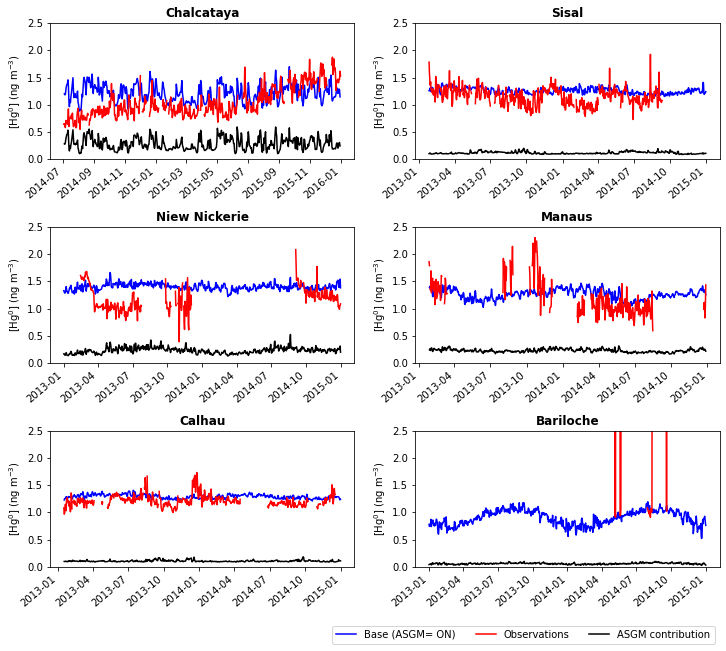

In [145]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12,10),gridspec_kw={'wspace':0.2,'hspace':0.5})#'width_ratios':[3, 2],
position = {'BAR':[2,1],'CAL':[2,0], 'MAN':[1,1],'NIK':[1,0], 'SIS':[0,1], 'CHC':[0,0]}
lines = []
labels = []
for gsite in position.keys():
    plot_data(gsite)
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)

from collections import OrderedDict
by_label = OrderedDict(zip(labels, lines))
ulabels=['Base (ASGM= ON)','Observations','ASGM contribution']
ulines=[by_label[ulabels[0]],by_label[ulabels[1]],by_label[ulabels[2]]]
fig.legend(ulines, ulabels,  bbox_to_anchor=(0.9, 0.05),ncol=6)
name='GMOS_Sites'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

In [146]:
Sites_ASGM={}
#Sites_OB={}
fname={'BAR':'Bariloche','CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Niew Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
for gsite in position.keys():
    if gsite=='CHC':
        start_dt= '2014-07-03'
        end_dt= '2015-07-03'
    else:
        start_dt='2014-07-03'
        end_dt= '2015-07-03'
    obs, model, asgm =prep_plot(gsite)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
    #obs, model, asgm =prep_plot(gsite)
    # vertconcat=pd.concat([obs, model, asgm], axis=1)
    # vertconcat.columns=['Observations','Reference Simulation','ASGM contribution']
    asgm_summary=asgm.describe()
    asgm_summary.columns=[fname[gsite]+' ASGM Contribution']
    obs_summary=obs.describe()
    obs_summary.columns=[fname[gsite]+' Observations']
    summaries=pd.concat([obs_summary,asgm_summary], axis=1)
    Sites_ASGM[gsite]=summaries
    #print(f"\n {gsite} \n {summary}")
    ##BAR,CAL,CST, MAN,NIK, SIS, CHC


In [147]:
vertconcat=pd.concat([Sites_ASGM['BAR'],Sites_ASGM['CAL'],Sites_ASGM['CHC'],Sites_ASGM['SIS'],Sites_ASGM['MAN'],Sites_ASGM['NIK']], axis=1)
print(vertconcat.T[['count', 'mean', 'std', 'min']])


#vertconcat.T.columns

                                 count       mean        std       min
Bariloche Observations           345.0  27.812049  15.062812  0.911746
Bariloche ASGM Contribution      366.0   0.059115   0.014333  0.027768
Calhau Observations              136.0   1.177899   0.074682  1.064660
Calhau ASGM Contribution         182.0   0.106957   0.014857  0.087496
Chalcataya Observations          333.0   0.902324   0.155042  0.548148
Chalcataya ASGM Contribution     365.0   0.282212   0.112530  0.099652
Sisal Observations                73.0   1.118577   0.152355  0.884611
Sisal ASGM Contribution          273.0   0.112079   0.017949  0.085208
Manaus Observations               48.0   0.991277   0.146979  0.594480
Manaus ASGM Contribution         179.0   0.210572   0.027751  0.162686
Niew Nickerie Observations       115.0   1.281164   0.153799  0.987363
Niew Nickerie ASGM Contribution  182.0   0.252442   0.044417  0.171076


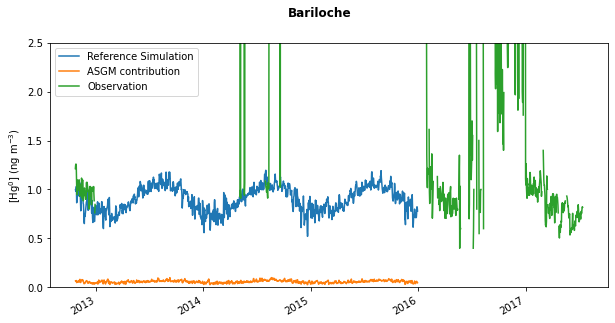

In [22]:
plot_data('BAR')

# Loop to create plots for all GMOS sites

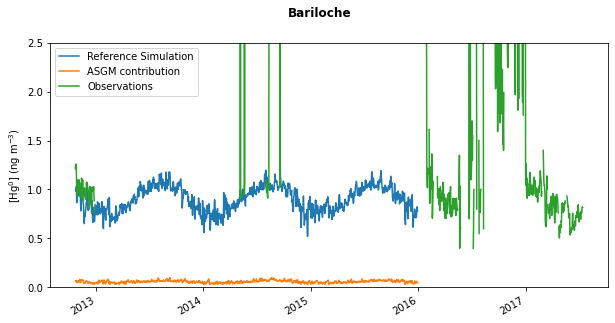

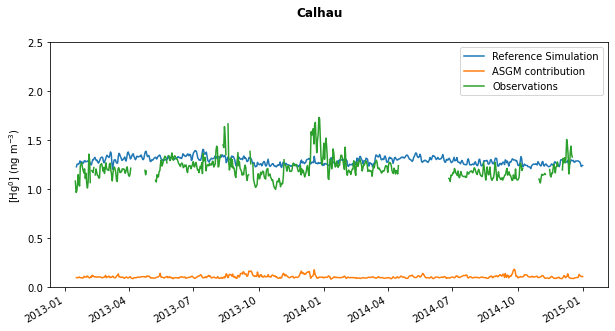

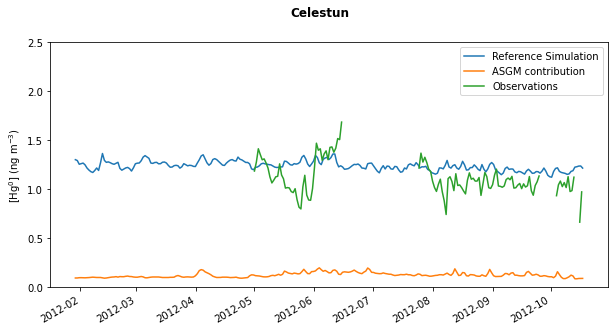

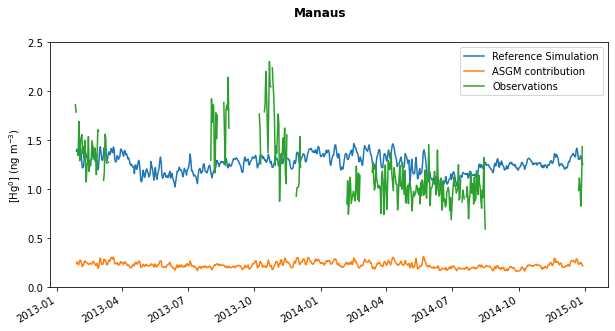

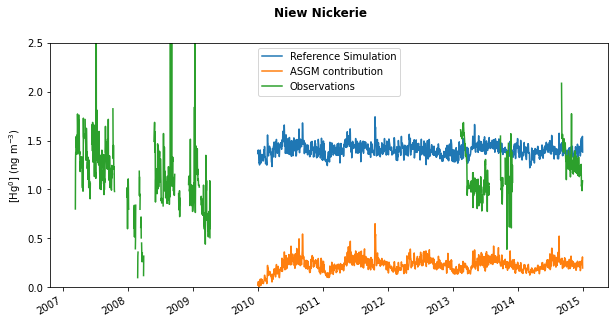

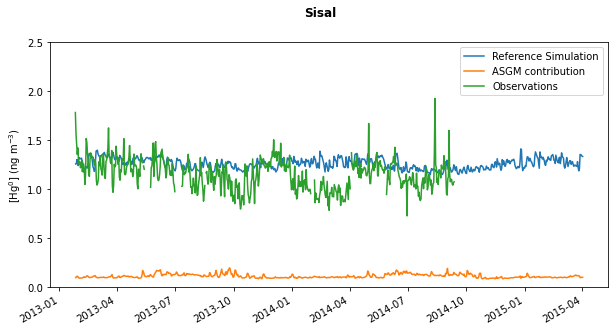

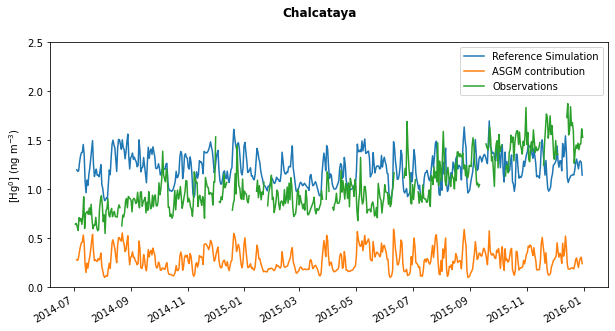

In [36]:
fname={'BAR':'Bariloche','CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Niew Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
for key in fname.keys():
    plot_data(key)

In [24]:
def scplot(site):
    obs, model, asgm =prep_plot(site)
    OBS=obs.to_frame()
    time=[]
    for item in OBS.index:
        time.append(str(item).split('+')[0].split(' ')[0])

    OBS['DATE']= time


    MOD=model.to_frame()
    date=[]
    for item in MOD.index:
        date.append(str(item).split('+')[0].split(' ')[0])
    MOD['DATE']=date
    
    
    import numpy as np
    from scipy import stats

    x = OBS[OBS['DATE'].isin(date)]['value']
    y=MOD[MOD['DATE'].isin(time)]['SpeciesConc_Hg0']

    fig = plt.figure(figsize=(10,8))
    z = np.linspace(0.5,2.5, 100)
    plt.plot(z, z, linestyle='dashed',label="1:1 line")
    plt.scatter(x,y, marker='o',color="purple",label="Data")


    plt.grid()
    plt.legend()
    plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
    plt.ylabel(' Simulated Concentration (ng/m3)', fontsize=14)
    fig.tight_layout()
    fig.suptitle(site,fontweight='bold')
    #fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')



In [25]:
def allplots(site):
    plot_data(site)
    #scplot(site)
    

In [26]:

diff=(Hg0_mdd-Hg0)
model_Hg0 = Hg0.to_dataframe().resample('D').mean()
model_Hg0_ASGM=diff.to_dataframe().resample('D').mean()
#model_Hg0_ASGM=Hg0_2x.to_dataframe().resample('D').mean()

In [27]:
model_Hg0 

,lev,lat,lon,SpeciesConc_Hg0
time,,,,
2014-01-01,0.61875,-16.0,-67.5,1.389880
2014-01-02,0.61875,-16.0,-67.5,1.526359
2014-01-03,0.61875,-16.0,-67.5,1.597889
2014-01-04,0.61875,-16.0,-67.5,1.375499
2014-01-05,0.61875,-16.0,-67.5,1.221905
...,...,...,...,...
2015-12-27,0.61875,-16.0,-67.5,1.278417
2015-12-28,0.61875,-16.0,-67.5,1.289867
2015-12-29,0.61875,-16.0,-67.5,1.273569


In [28]:
#%% Load ASGM emission data
fn1 = '/net/fs03/d1/tzd/RAworkflow/emissions/output_file.nc'
ds1 = xr.open_dataset(fn1)

lat_GMA = ds1.lat
lon_GMA = ds1.lon
Hg0_emiss_ASGM_GMA = ds1.emi_hg_0




In [29]:
# Call function with site name
sitenm = 'CHC'
obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs(sitenm)
#%%
#resample observations so that they are daily values
obs_Hg0['value'] = obs_Hg0['value'].mask(obs_Hg0['value']<0) #missing values
#obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'])
obs_Hg0_d = obs_Hg0.set_index('tstamp').resample('D').mean() #daily mean values, ignoring NaN


In [30]:
# f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
#                        gridspec_kw=dict(hspace=0.3, wspace=0.3))
# #axes = axes.flatten()
                       
# axes.coastlines()
# #peru_sf.geometry.boundary.plot(ax=axes,Color=None, edgecolor='k',linewidth = 1)
# h = axes.pcolormesh(lon_GMA, lat_GMA, Hg0,cmap=WhGrYlRd,rasterized = True)

# axes.set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 16, fontweight='bold'); #title
# axes.set_xlim([-90, 0])
# axes.set_ylim([-80, 10])
# axes.add_feature(cf.BORDERS)
# cbar = f.colorbar(h)
# cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)

In [31]:
# #%% example plot
# f,  axes = plt.subplots(1, 1,figsize=(16,8))

# model_Hg0.SpeciesConc_Hg0.plot()
# model_Hg0_ASGM.SpeciesConc_Hg0.plot()

# #remove NaN values
# obs_Hg0_d.plot(ax=axes)

# axes.set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
# axes.set_xlabel('')

# #axes.legend(["Model", "ASGM (model)","OBS"]);
# axes.legend(["Base Emissions", "2xMDD Emissions","OBS"]);

# # adjust x axis so that measurement period highlighted
# min_model= pd.to_datetime('2011-01-01',utc=True) #minimum model time
# xmin_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].min() 
# xmax_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].max() 

# plt.xlim([xmin_obs, xmax_obs])
# f.suptitle(sitenm,fontweight='bold')
# #f.savefig('Figures/obs_model_' + sitenm + '.pdf',bbox_inches = 'tight')

In [32]:
# #%% plot linear regression

# f,  axes = plt.subplots(1, 1,figsize=(16,8))

# model_Hg0.SpeciesConc_Hg0.plot()
# model_Hg0_ASGM.SpeciesConc_Hg0.plot()

# #remove NaN values
# obs_Hg0_d['value'].plot(ax=axes)

# axes.plot(obs_Hg0_d.index, Y_pred)

# axes.set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
# axes.set_xlabel('')

# axes.legend(["Base Emissions", "2xMDD Emissions","OBS","OBS_trend"]);

# # adjust x axis so that measurement period highlighted
# min_model= pd.to_datetime('2011-01-01',utc=True) #minimum model time
# xmin_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].min() 
# xmax_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].max() 

# plt.xlim([xmin_obs, xmax_obs])
# f.suptitle(sitenm,fontweight='bold')
# #f.savefig('Figures/obs_model_CHC_reg_obs.pdf',bbox_inches = 'tight')


In [33]:
#%% Detrend observational dataset

#calculate linear regression on observations
X_temp = pd.to_datetime(obs_Hg0_d.index).map(datetime.datetime.toordinal) # convert from datetime to ordinal
X = X_temp.values.reshape(-1, 1)   # values converts it into a numpy array
Y = obs_Hg0_d.value.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
mask = ~np.isnan(X) & ~np.isnan(Y) #mask NaN values

result = stats.linregress(X[mask], Y[mask])
Y_pred = X * result.slope + result.intercept

obs_Hg0_d['detrend_obs'] = Y - Y_pred

In [34]:
#%% find overlapping values in observation and model time series, for comparison
# helpful to create dataframe of model data first
model_Hg0_df = model_Hg0.to_dataframe()
model_Hg0_df['ASGM'] = model_Hg0_ASGM.values
model_Hg0_df['noASGM'] = model_Hg0_df['SpeciesConc_Hg0'] - model_Hg0_df['ASGM'] #non-ASGM Hg0

model_Hg0_df.index = model_Hg0_df.index.tz_localize('UTC') #set utc timezone
model_Hg0_df.index = model_Hg0_df.index - pd.Timedelta(hours=12) #line up hours with obs 

#calculate anomalies for model and ASGM
model_Hg0_df['anom'] = model_Hg0 - model_Hg0.mean()
model_Hg0_df['anom_ASGM']= model_Hg0_ASGM - model_Hg0_ASGM.mean() 
model_Hg0_df['anom_noASGM']= model_Hg0_df['noASGM'] - model_Hg0_df['noASGM'].mean() 

#drop all NaNs from observational dataset, for easier statistics
obs_df_no_nan = obs_Hg0_d.dropna()

#merge datasets to see where overlap
merge_df = pd.merge(right=model_Hg0_df, right_on=model_Hg0_df.index, 
                      left=obs_df_no_nan, left_on=obs_df_no_nan.index)

AttributeError: 'DataFrame' object has no attribute 'to_dataframe'

In [ ]:
#%% calculate correlations
corr_p_model_ASGM, _ = stats.pearsonr(model_Hg0_df['SpeciesConc_Hg0'],model_Hg0_df['ASGM'] )
# in model, ASGM explains 85% of variability at CHC
corr_p_model_obs, _ = stats.pearsonr(merge_df['SpeciesConc_Hg0'],merge_df['value'] )
corr_p_ASGM_obs, _ = stats.pearsonr(merge_df['ASGM'],merge_df['value'] )
corr_p_noASGM_obs, _ = stats.pearsonr(merge_df['noASGM'],merge_df['value'] )

# low correlations between model/obs, now check anomalies

corr_p_model_obs_anom, _ = stats.pearsonr(merge_df['anom'],merge_df['detrend_obs'] )
corr_p_ASGM_obs_anom, _ = stats.pearsonr(merge_df['anom_ASGM'],merge_df['detrend_obs'] )
corr_p_noASGM_obs_anom, _ = stats.pearsonr(merge_df['anom_noASGM'],merge_df['detrend_obs'] )

#Of all highest correlation between no ASGM and observations (0.42 correlation, p = 10^-22)
corr_p_model_obs_anom_s, _ = stats.spearmanr(merge_df['anom'],merge_df['detrend_obs'] )

std_obs =  np.std(merge_df['detrend_obs'])
std_model =  np.std(merge_df['anom'])
std_model_noASGM =  np.std(merge_df['anom_noASGM'])

In [ ]:
#%% plot detrended data
f,  axes = plt.subplots(2, 2, figsize=[16,8], gridspec_kw=dict(hspace=0.3, wspace=0.2))
axes = axes.flatten()

#Time Series
model_Hg0_df['anom'].plot(ax=axes[0])
#model_Hg0_df['anom_ASGM'].plot()


axes[0].plot(obs_Hg0_d.index, Y - Y_pred)

axes[0].set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
axes[0].set_xlabel('')

axes[0].legend(["Model: anomaly","OBS: detrend"]);

# adjust x axis so that measurement period highlighted
min_model= pd.to_datetime('2011-01-01',utc=True) #minimum model time
xmin_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].min() 
xmax_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].max() 

axes[0].set_xlim([xmin_obs, xmax_obs])
axes[0].text(0.08, 0.95,"\u03C1 = %0.2f" % (corr_p_model_obs_anom),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[0].transAxes)

axes[0].text(0.08, 0.88,"\u03C3$_{OBS}$ = %0.2f" % (std_obs),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[0].transAxes)

axes[0].text(0.08, 0.81,"\u03C3$_{MOD}$ = %0.2f" % (std_model),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[0].transAxes)

xfmt = axes[0].xaxis.get_major_formatter() # use date format for other axes

#Scatter plot
axes[1].plot(merge_df['detrend_obs'], merge_df['anom'], 'o', color='black')
#plot higher anomalies in a different color
axes[1].plot(merge_df['detrend_obs'][merge_df['detrend_obs']>0.3], merge_df['anom'][merge_df['detrend_obs']>0.3], 'o', color='red')
axes[1].plot(merge_df['detrend_obs'][merge_df['anom']>0.3], merge_df['anom'][merge_df['anom']>0.3], 'o', color='red')

axes[1].set_xlabel('Obs anomaly (ng m$^{-3}$)')
axes[1].set_ylabel('Model anomaly (ng m$^{-3}$)')

# Difference plot
axes[2].plot(merge_df['key_0'], merge_df['detrend_obs'] - merge_df['anom'])

axes[2].xaxis.set_major_formatter(xfmt)
axes[2].set_xlim([xmin_obs, xmax_obs])
axes[2].set_title("Obs anomaly minus model anomaly")
axes[2].set_ylabel('Difference (ng m$^{-3}$)')

# Box plots - observation and model
merge_df['month'] = merge_df['key_0'].dt.month
mod_month_mean = np.zeros(12) #create array of zeros
mod_month_std = np.zeros(12) #create array of zeros
obs_month_mean = np.zeros(12) #create array of zeros
obs_month_std = np.zeros(12) #create array of zeros

for i in range(12):
    mod_month_mean[i] = merge_df['anom'][merge_df['month']==i+1].mean()
    mod_month_std[i] = merge_df['anom'][merge_df['month']==i+1].std()
    obs_month_mean[i] = merge_df['detrend_obs'][merge_df['month']==i+1].mean()
    obs_month_std[i] = merge_df['detrend_obs'][merge_df['month']==i+1].std()

months = np.arange(0, 12, 1)
months_str = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
axes[3].errorbar(months, mod_month_mean, yerr=mod_month_std)
axes[3].errorbar(months, obs_month_mean, yerr=obs_month_std)    

# Set the tick positions
axes[3].set_xticks(months)
# Set the tick labels
axes[3].set_xticklabels(months_str)
axes[3].legend(["Model: anomaly","OBS: detrend"]);  
axes[3].set_ylabel('Anomaly (ng m$^{-3}$)')

f.suptitle(sitenm,fontweight='bold')
#f.savefig('Figures/obs_model_CHC_detrend_obs_v2.pdf',bbox_inches = 'tight')

In [ ]:
#%% Investigate interesting cases with hysplit
merge_df['diff'] = merge_df['detrend_obs'] - merge_df['anom'] #model observation difference
high_case = merge_df.sort_values('diff', ascending=False).head(5)
low_case = merge_df.sort_values('diff', ascending=True).head(5)

print(high_case['key_0'])
print(low_case['key_0'])

In [ ]:

#%% Plot without ASGM correlation

f,  axes = plt.subplots(1, 1, figsize=[16,8], gridspec_kw=dict(hspace=0.3, wspace=0.2))

#Time Series
model_Hg0_df['anom_noASGM'].plot(ax=axes)
#model_Hg0_df['anom_ASGM'].plot()


axes.plot(obs_Hg0_d.index, Y - Y_pred)

axes.set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
axes.set_xlabel('')

axes.legend(["Model without ASGM: anomaly","OBS: detrend"]);

# adjust x axis so that measurement period highlighted
min_model= pd.to_datetime('2011-01-01',utc=True) #minimum model time
xmin_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].min() 
xmax_obs = obs_Hg0_d.index[obs_Hg0_d.index>min_model].max() 

axes.set_xlim([xmin_obs, xmax_obs])
axes.text(0.08, 0.95,"\u03C1 = %0.2f" % (corr_p_noASGM_obs_anom),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes.transAxes)

axes.text(0.08, 0.88,"\u03C3$_{OBS}$ = %0.2f" % (std_obs),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes.transAxes)

axes.text(0.08, 0.81,"\u03C3$_{MOD}$ = %0.2f" % (std_model_noASGM),
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes.transAxes)

f.suptitle(sitenm,fontweight='bold')
#f.savefig('Figures/obs_model_CHC_noASGM.pdf',bbox_inches = 'tight')


In [ ]:
allplots('CHC')

In [ ]:
allplots('CHC')

In [ ]:
allplots('CHC')

In [ ]:
allplots('CHC')

In [ ]:
allplots('CHC')

In [ ]:
allplots('CHC')

# Make  Site Plots 

# Calhau

In [ ]:
allplots('CAL')

# Sisal

In [ ]:
allplots('SIS')

# CHC

In [ ]:
allplots('CHC')

# MAN

In [ ]:
allplots('MAN')

# NIK

In [ ]:
allplots('NIK')

In [ ]:
allplots('NIK')

In [ ]:
ob, mo, ag, =prep_plot('NIK')
ob

# BAR

In [ ]:
allplots('BAR')

In [ ]:
obs.max()

In [ ]:
sites = ['BAR','CAL','CST', 'MAN','NIK','SIS', 'CHC']
meanmod=[]
meanob=[]
for site in sites:
    obs, model, asgm =prep_plot(site)
    meanob.append(obs.mean())
    meanmod.append(model.mean())

In [ ]:
x =meanob
y=meanmod
fig = plt.figure(figsize=(10,8))
z = np.linspace(0.75,1.4, 100)
plt.plot(z, z, linestyle='dashed',label="1:1 line")
plt.scatter(x,y, marker='o',color="blue",label="Data")


plt.grid()
plt.legend()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel(' Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
fig.suptitle('Observations Means vs Model Means',fontweight='bold')
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')




In [ ]:
bari = get_data('BAR')


In [ ]:
bari=bari.loc[bari['value']>0]

In [ ]:
bari.loc[bari['value']<5]['value'].mean()

In [ ]:
# Call function with site name
sitenm = 'NIK' #BAR,CAL,CST, MAN,NIK, SIS, CHC
obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs(sitenm)
#%%
if site =='BAR':
    obs_Hg0= obs_Hg0.loc[obs_Hg0['value']<5]


#resample observations so that they are daily values
obs_Hg0['value'] = obs_Hg0['value'].mask(obs_Hg0['value']<0) #missing values
obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'])
obs_Hg0_d = obs_Hg0.set_index('tstamp').resample('D').mean() #daily mean values, ignoring NaN

obs_Hg0['value'] = obs_Hg0['value'].mask(obs_Hg0['value']<0) #missing values
obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'])
obs_Hg0_d = obs_Hg0.set_index('tstamp').resample('D').mean() #daily mean values, ignoring NaN


start = str(obs_Hg0['tstamp'].iloc[0])
end =str(obs_Hg0['tstamp'].iloc[-1])
if sitenm== 'CHC':
    start=start.split('+')[0]
    end=end.split('+')[0]
#elif site =='NIK':

In [ ]:
obs_Hg0['year']=str(obs_Hg0['tstamp']).split('-')

In [ ]:
for item in obs_Hg0['tstamp'].values:
    year=str(item).split('-')[0]
    print(year)